![Alt text](https://imgur.com/orZWHly.png=80)
source: @allison_horst https://github.com/allisonhorst/penguins

You have been asked to support a team of researchers who have been collecting data about penguins in Antartica! The data is available in csv-Format as `penguins.csv`

**Origin of this data** : Data were collected and made available by Dr. Kristen Gorman and the Palmer Station, Antarctica LTER, a member of the Long Term Ecological Research Network.

**The dataset consists of 5 columns.**

Column | Description
--- | ---
culmen_length_mm | culmen length (mm)
culmen_depth_mm | culmen depth (mm)
flipper_length_mm | flipper length (mm)
body_mass_g | body mass (g)
sex | penguin sex

Unfortunately, they have not been able to record the species of penguin, but they know that there are **at least three** species that are native to the region: **Adelie**, **Chinstrap**, and **Gentoo**.  Your task is to apply your data science skills to help them identify groups in the dataset!

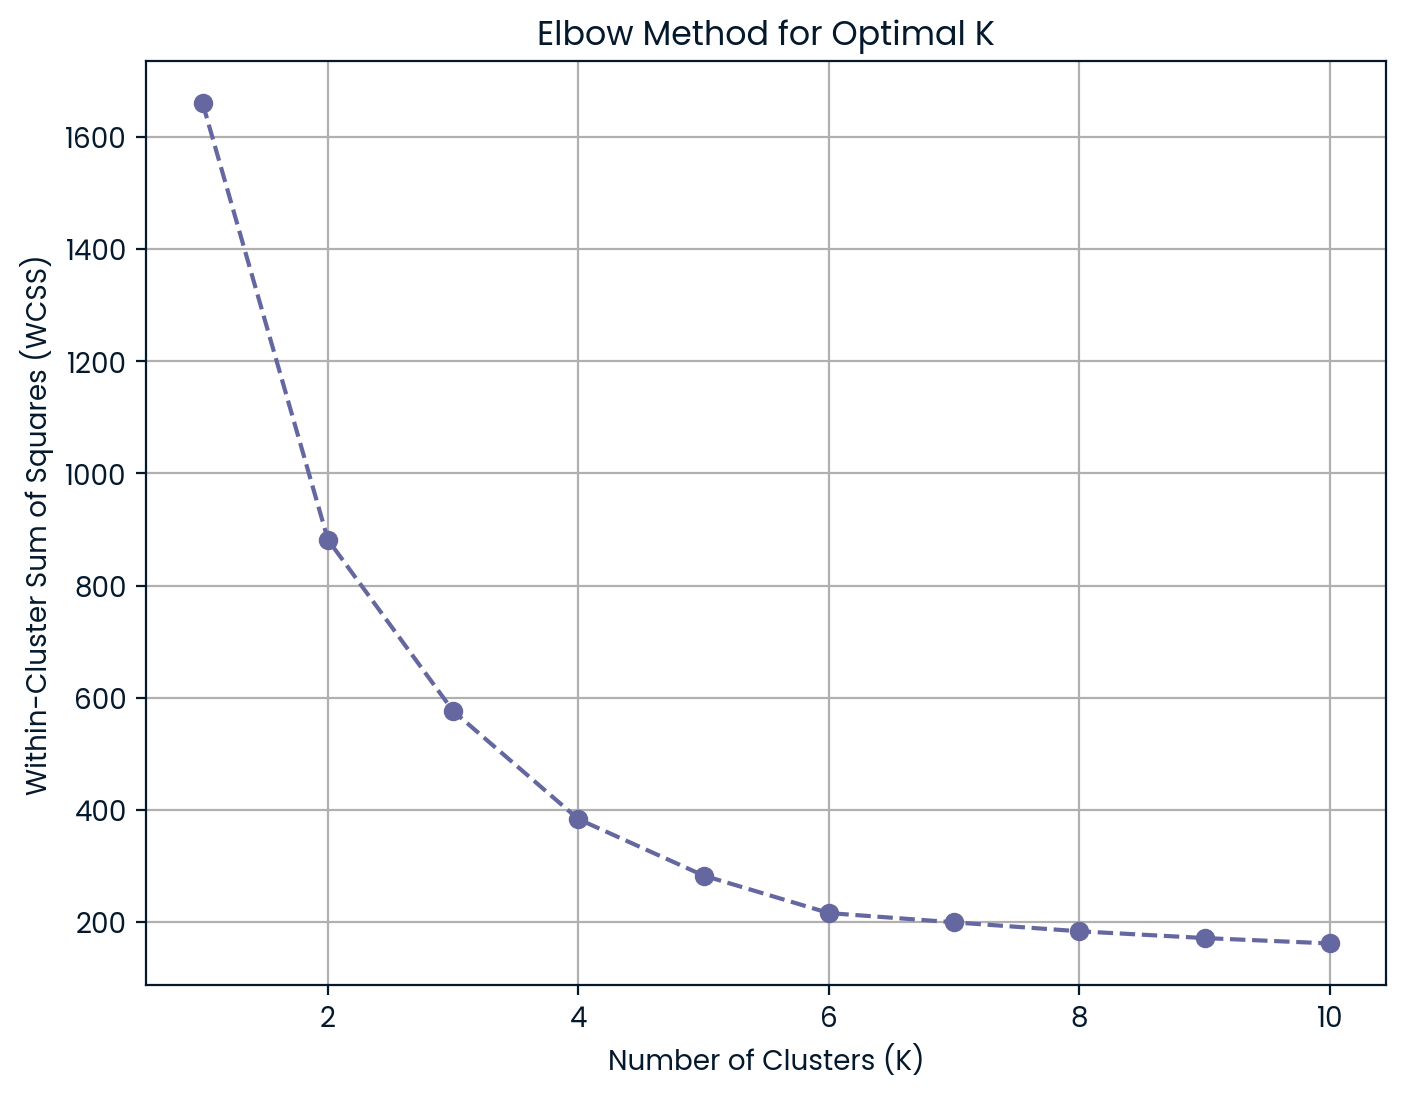

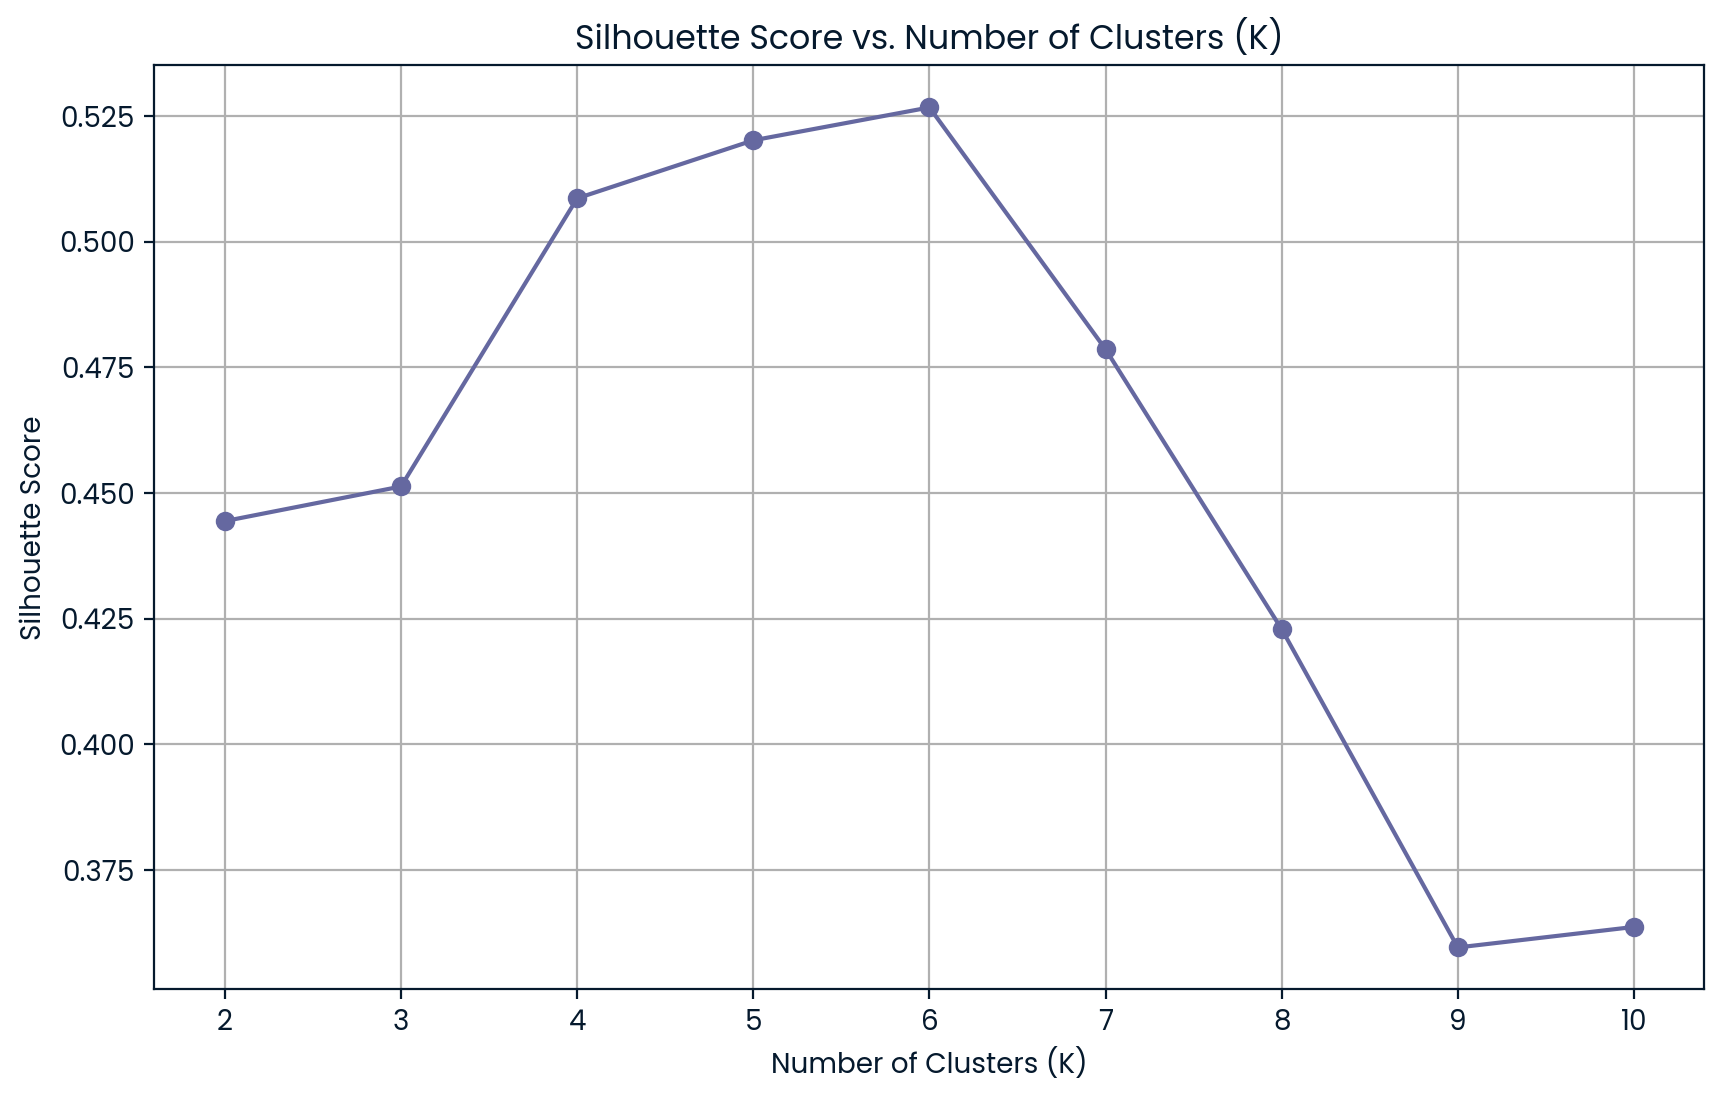


Optimal number of clusters based on Silhouette Score: 6


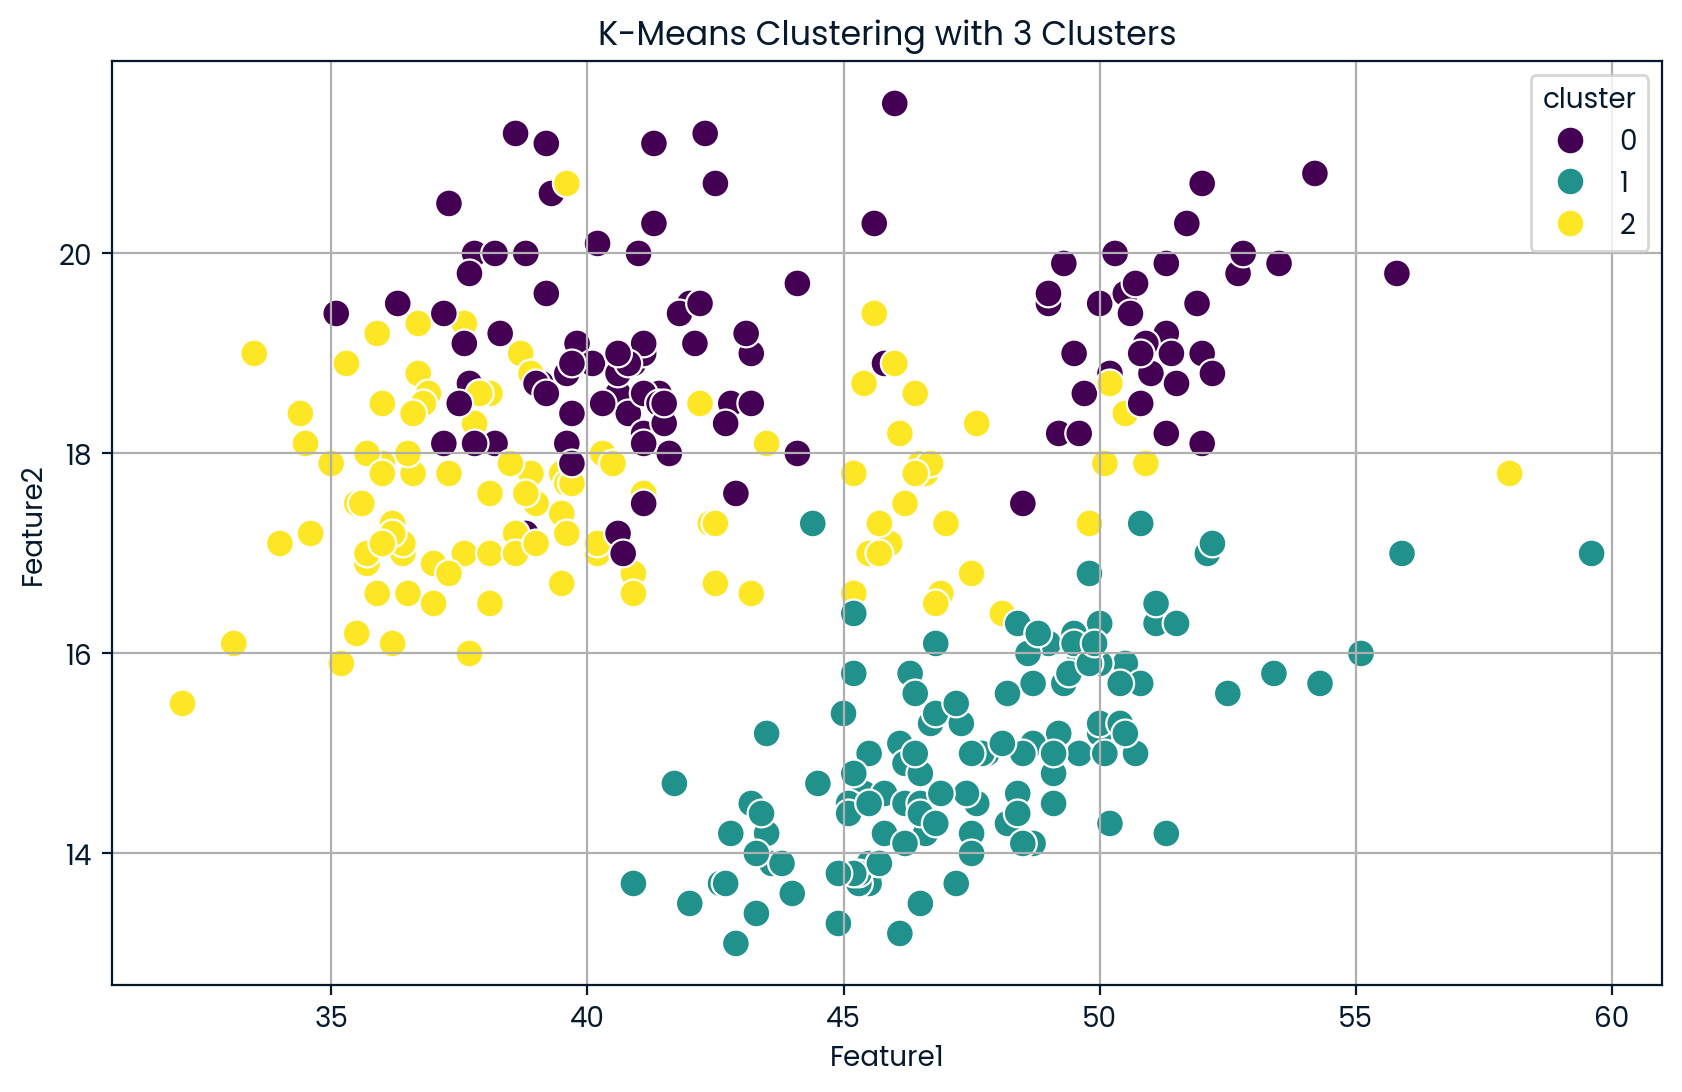

         culmen_length_mm  culmen_depth_mm  ...  body_mass_g       sex
cluster                                     ...                       
0               43.878302        19.111321  ...  4006.603774  0.000000
1               47.568067        14.996639  ...  5092.436975  0.487395
2               40.217757        17.611215  ...  3419.158879  1.000000

[3 rows x 5 columns]


In [46]:
# Import Required Packages
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
import seaborn as sns

# Load the dataset
penguins_df = pd.read_csv("penguins.csv")
df = penguins_df
#df.info() # Get a summary of the DataFrame, including data types and non-null values
#df.head() # View the first few rows of the DataFrame
#df.describe() # Get descriptive statistics for numerical columns
#print(df.isnull().sum())

# Clean / Transform Data
#df['sex'].value_counts().plot(kind='bar')
#plt.show()
sex_mapping = {'MALE': 0, 'FEMALE': 1}
df['sex'] = df['sex'].replace(sex_mapping)
#print(df.isnull().sum())
#df.info() # Get a summary of the DataFrame, including data types and non-null values
df.head() # View the first few rows of the DataFrame
#df.describe() # Get descriptive statistics for numerical columns

# Preprocessing: Scaling the data
# K-Means is sensitive to the scale of the features, so scaling is often recommended.
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)
scaled_df = pd.DataFrame(scaled_data, columns=['culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm', 'body_mass_g', 'sex'])

#print("\nScaled DataFrame:")
#print(scaled_df)

# DETERMINE OPTIMAL NUMBER OF CLUSTERS
# -- Apply Elbow Method
wcss = []  # List to store Within-Cluster Sum of Squares
max_k = 10 # Maximum number of clusters to test

for i in range(1, max_k + 1):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42, n_init=10)
    kmeans.fit(scaled_df)
    wcss.append(kmeans.inertia_) # inertia_ is the WCSS

# Plot the Elbow Curve
plt.figure(figsize=(8, 6))
plt.plot(range(1, max_k + 1), wcss, marker='o', linestyle='--')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.grid(True)
plt.show()

# -- Apply Silhouette Score Method
silhouette_scores = []
range_n_clusters = range(2, 11)  # Test K from 2 to 10

for n_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init=10)
    cluster_labels = kmeans.fit_predict(scaled_df)
    score = silhouette_score(scaled_df, cluster_labels)
    silhouette_scores.append(score)
    #print(f"For n_clusters = {n_clusters}, Silhouette Score = {score:.4f}")

# Plot the Silhouette Scores
plt.figure(figsize=(10, 6))
plt.plot(range_n_clusters, silhouette_scores, marker='o')
plt.title('Silhouette Score vs. Number of Clusters (K)')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Silhouette Score')
plt.grid(True)
plt.show()

# Determine optimal K and perform final clustering
optimal_k = range_n_clusters[silhouette_scores.index(max(silhouette_scores))]
print(f"\nOptimal number of clusters based on Silhouette Score: {optimal_k}")

# APPLY K-MEANS CLUSTERING
# Choose the number of clusters (K)
n_clusters = 3
kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init=10) # n_init for robustness
kmeans.fit(scaled_df)

# Add cluster labels to the original DataFrame
df['cluster'] = kmeans.labels_

#print("\nDataFrame with Cluster Labels:")
#print(df.isnull().sum())
#df.info() # Get a summary of the DataFrame, including data types and non-null values
#df.head() # View the first few rows of the DataFrame
#df.describe() # Get descriptive statistics for numerical columns

# 6. Visualize the clusters (for 2D data)
plt.figure(figsize=(10, 6))
sns.scatterplot(x='culmen_length_mm', y='culmen_depth_mm', hue='cluster', data=df, palette='viridis', s=100)
plt.title(f'K-Means Clustering with {n_clusters} Clusters')
plt.xlabel('Feature1')
plt.ylabel('Feature2')
plt.grid(True)
plt.show()

# Group by 'Category' and calculate the sum of 'Value' for each group
stat_penguins = df.groupby('cluster')['culmen_length_mm','culmen_depth_mm','flipper_length_mm', 'body_mass_g', 'sex'].mean()
print(stat_penguins)



